### Scaling Preprocessing Task
표정 분류  
**flow_from_dataframe()을 사용한다.**

In [1]:
from glob import glob
import os

train_root = './datasets/face/train/'
test_root = './datasets/face/test/'

directories = glob(os.path.join(train_root, '*'))

In [2]:
directories

['./datasets/face/train\\angry',
 './datasets/face/train\\disgust',
 './datasets/face/train\\fear',
 './datasets/face/train\\happy',
 './datasets/face/train\\neutral',
 './datasets/face/train\\sad',
 './datasets/face/train\\surprise']

In [3]:
directory_names = []

for directory in directories:
    directory_names.append(directory[directory.rindex('\\') + 1:])

print(directory_names)

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


In [4]:
# for name in directory_names:
#     for i, file_name in enumerate(os.listdir(os.path.join(train_root, name))):
#         old_file = os.path.join(train_root + name + '/', file_name)
#         new_file = os.path.join(train_root + name + '/', name + str(i + 1) + '.png')

#         os.rename(old_file, new_file)

In [5]:
# for name in directory_names:
#     for i, file_name in enumerate(os.listdir(os.path.join(test_root, name))):
#         old_file = os.path.join(test_root + name + '/', file_name)
#         new_file = os.path.join(test_root + name + '/', name + str(i + 1) + '.png')

#         os.rename(old_file, new_file)

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

idg = ImageDataGenerator(rescale=1./255)

train_generator = idg.flow_from_directory(train_root, target_size=(150, 150), batch_size=32, class_mode='categorical')
test_generator = idg.flow_from_directory(test_root, target_size=(150, 150), batch_size=32, class_mode='categorical')

print(train_generator.class_indices)
print(test_generator.class_indices)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
{'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}
{'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}


In [7]:
trian_target_name = {v: k for k, v in train_generator.class_indices.items()}
trian_target_name

{0: 'angry',
 1: 'disgust',
 2: 'fear',
 3: 'happy',
 4: 'neutral',
 5: 'sad',
 6: 'surprise'}

In [8]:
test_target_name = {v: k for k, v in test_generator.class_indices.items()}
test_target_name

{0: 'angry',
 1: 'disgust',
 2: 'fear',
 3: 'happy',
 4: 'neutral',
 5: 'sad',
 6: 'surprise'}

In [9]:
train_target_names = []
for target in train_generator.classes:
    train_target_names.append(trian_target_name[target])

In [10]:
test_target_names = []
for target in test_generator.classes:
    test_target_names.append(test_target_name[target])

In [11]:
import pandas as pd

train_df = pd.DataFrame({'file_paths':train_generator.filepaths, 'target_names': train_target_names, 'targets': train_generator.classes})
train_df.file_paths = train_df.file_paths.apply(lambda x: x.replace('\\', '/'))
train_df

,file_paths,target_names,targets
0,./datasets/face/train/angry/angry1.png,angry,0
1,./datasets/face/train/angry/angry10.png,angry,0
2,./datasets/face/train/angry/angry100.png,angry,0
3,./datasets/face/train/angry/angry1000.png,angry,0
4,./datasets/face/train/angry/angry1001.png,angry,0
...,...,...,...
28704,./datasets/face/train/surprise/surprise995.png,surprise,6
28705,./datasets/face/train/surprise/surprise996.png,surprise,6
28706,./datasets/face/train/surprise/surprise997.png,surprise,6
28707,./datasets/face/train/surprise/surprise998.png,surprise,6


In [12]:
import pandas as pd

test_df = pd.DataFrame({'file_paths':test_generator.filepaths, 'target_names': test_target_names, 'targets': test_generator.classes})
test_df.file_paths = test_df.file_paths.apply(lambda x: x.replace('\\', '/'))
test_df

,file_paths,target_names,targets
0,./datasets/face/test/angry/angry1.png,angry,0
1,./datasets/face/test/angry/angry10.png,angry,0
2,./datasets/face/test/angry/angry100.png,angry,0
3,./datasets/face/test/angry/angry101.png,angry,0
4,./datasets/face/test/angry/angry102.png,angry,0
...,...,...,...
7173,./datasets/face/test/surprise/surprise95.png,surprise,6
7174,./datasets/face/test/surprise/surprise96.png,surprise,6
7175,./datasets/face/test/surprise/surprise97.png,surprise,6
7176,./datasets/face/test/surprise/surprise98.png,surprise,6


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = \
train_test_split(train_df.file_paths, train_df.targets, stratify=train_df.targets, test_size=0.2, random_state=124)

X_test = test_df.file_paths
y_test = test_df.targets

print(y_train.value_counts())
print(y_validation.value_counts())
print(y_test.value_counts())

targets
3    5772
4    3972
5    3864
2    3277
0    3196
6    2537
1     349
Name: count, dtype: int64
targets
3    1443
4     993
5     966
2     820
0     799
6     634
1      87
Name: count, dtype: int64
targets
3    1774
5    1247
4    1233
2    1024
0     958
6     831
1     111
Name: count, dtype: int64


In [14]:
train_df2 = train_df.iloc[X_train.index].reset_index(drop=True)
validation_df = train_df.iloc[X_validation.index].reset_index(drop=True)

In [15]:
print(train_df.shape)
print(validation_df.shape)
print(test_df.shape)

(28709, 3)
(5742, 3)
(7178, 3)


In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import albumentations as A

def preprocessing_scaling_for_train(image, mode='tf'):
    aug = A.HorizontalFlip(p=0.5)
    image = aug(image=image)['image']
    
    if mode == 'tf': # -1 ~ 1 scale
        image = image / 127.5
        image -= 1.
    
    elif mode == 'torch': # z-score scale
        image = image / 255.
        mean = [0.485, 0.456, 0.406]
        std = [0.229, 0.224, 0.225]
        
        image[:, :, 0] = (image[:, :, 0] - mean[0])/std[0]
        image[:, :, 1] = (image[:, :, 1] - mean[1])/std[1]
        image[:, :, 2] = (image[:, :, 2] - mean[2])/std[2]
        
    return image

def preprocessing_scaling(image, mode='tf'):
    if mode == 'tf': # -1 ~ 1 scale
        image = image / 127.5
        image -= 1.
    
    elif mode == 'torch': # z-score scale
        image = image / 255.
        mean = [0.485, 0.456, 0.406]
        std = [0.229, 0.224, 0.225]
        
        image[:, :, 0] = (image[:, :, 0] - mean[0])/std[0]
        image[:, :, 1] = (image[:, :, 1] - mean[1])/std[1]
        image[:, :, 2] = (image[:, :, 2] - mean[2])/std[2]
        
    return image

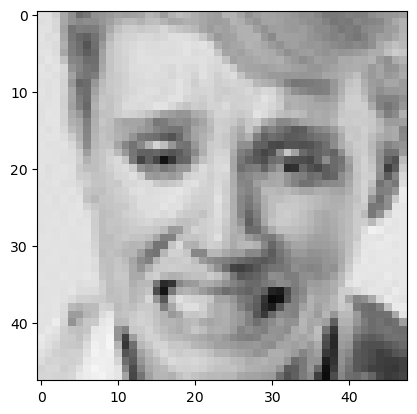

In [21]:
import cv2
import matplotlib.pyplot as plt

image = cv2.cvtColor(cv2.imread(train_df.file_paths.iloc[3007]), cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

In [23]:
scaled_image_tf = preprocessing_scaling(image, mode='tf')
scaled_image_torch = preprocessing_scaling(image, mode='torch')

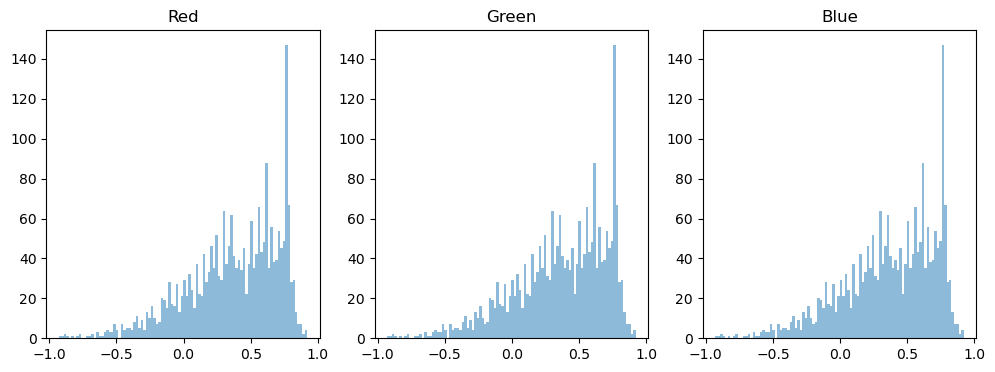

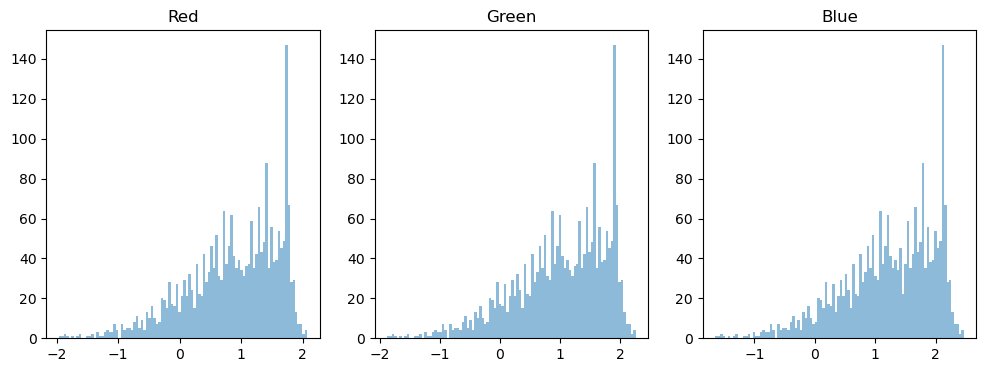

In [24]:
def show_pixel_histogram(image):
    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
    titles = ['Red', 'Green', 'Blue']
    for i in range(3):
        axs[i].hist(image[:, :, i].flatten(), bins=100, alpha=0.5)
        title_str = titles[i]
        axs[i].set(title=title_str)

show_pixel_histogram(scaled_image_tf)
show_pixel_histogram(scaled_image_torch)

In [19]:
IMAGE_SIZE = 64
BATCH_SIZE = 64

In [20]:
train_generator = ImageDataGenerator(preprocessing_function=preprocessing_scaling_for_train)
validation_generator = ImageDataGenerator(preprocessing_function=preprocessing_scaling)
test_generator = ImageDataGenerator(preprocessing_function=preprocessing_scaling)

train_flow = train_generator.flow_from_dataframe(dataframe=train_df, 
                                                 x_col='file_paths', 
                                                 y_col='target_names',
                                                 target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                                 class_mode='categorical',
                                                 shuffle=True)

validation_flow = validation_generator.flow_from_dataframe(dataframe=validation_df, 
                                                 x_col='file_paths', 
                                                 y_col='target_names',
                                                 target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                                 class_mode='categorical')

test_flow = test_generator.flow_from_dataframe(dataframe=test_df, 
                                                 x_col='file_paths', 
                                                 y_col='target_names',
                                                 target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                                 class_mode='categorical')

print(train_flow.class_indices)
print(validation_flow.class_indices)
print(test_flow.class_indices)

Found 28709 validated image filenames belonging to 7 classes.
Found 5742 validated image filenames belonging to 7 classes.
Found 7178 validated image filenames belonging to 7 classes.
{'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}
{'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}
{'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}


In [27]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D, BatchNormalization

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications import Xception

def create_model(model_name='vgg16', verbose=False):
    input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
    if model_name == 'vgg16':
        model = VGG16(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'resnet50': # ResNet50, 74.9% ; ResNet50V2, 76.0%
        model = ResNet50V2(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'xception': # Inception을 기초로 한 모델
        model = Xception(input_tensor=input_tensor, include_top=False, weights='imagenet')

    x = model.output

    # 분류기
    x = GlobalAveragePooling2D()(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    x = Dense(50, activation='relu')(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    output = Dense(7, activation='softmax', name='output')(x)
    
    model = Model(inputs=input_tensor, outputs=output)
    
    if verbose:
        model.summary()
    
    return model

In [28]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.losses import CategoricalCrossentropy

# mcp_cb = ModelCheckpoint(
#     filepath="./callback_files/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
#     monitor='val_loss',
#     save_best_only=False,
#     save_weights_only=True,
#     mode='min'
# )

rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=2,
    mode='min'
)

ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=4,
    mode='min'
)

model = create_model(verbose=True)
model.compile(optimizer=Adam(), loss=CategoricalCrossentropy, metrics=['acc'])

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 50)                  │          25,6

 Total params: 14,740,695 (56.23 MB)

 Trainable params: 14,740,695 (56.23 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
import gc

gc.collect()

94453

In [30]:
history = model.fit(train_flow, 
                    batch_size=BATCH_SIZE, 
                    epochs=10, 
                    validation_data=validation_flow, 
                    callbacks=[rlr_cb, ely_cb])

Epoch 1/10


C:\Users\LEGION\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


898/898 ━━━━━━━━━━━━━━━━━━━━ 1007s 1s/step - acc: 0.2385 - loss: 1.9036 - val_acc: 0.2513 - val_loss: 1.8140 - learning_rate: 0.0010
Epoch 2/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 1032s 1s/step - acc: 0.2542 - loss: 1.8109 - val_acc: 0.2513 - val_loss: 1.8130 - learning_rate: 0.0010
Epoch 3/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 1015s 1s/step - acc: 0.2487 - loss: 1.8135 - val_acc: 0.2513 - val_loss: 1.8106 - learning_rate: 0.0010
Epoch 4/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 1019s 1s/step - acc: 0.2526 - loss: 1.8116 - val_acc: 0.2513 - val_loss: 1.8116 - learning_rate: 0.0010
Epoch 5/10
 66/898 ━━━━━━━━━━━━━━━━━━━━ 16:05 1s/step - acc: 0.2428 - loss: 1.8145


KeyboardInterrupt

